## 1. Import Dataset

Mental Health in Tech Survey 
https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [1]:
# TODO: Import data set
import numpy as np
import pandas as pd
mh_df = pd.read_csv("./data/survey.csv")
mh_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
# Check the nubmer of rows and columns
mh_df.shape

(1259, 27)

In [3]:
# Check the data types
mh_df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [4]:
# Change some column names
mh_df.rename(columns={"Timestamp":"timestamp", "Age": "age", "Gender": "gender", "Country": "country"}, inplace=True)
mh_df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## 2. Data cleaning

1) Change Gender values

In [5]:
# TODO: Cleaning: Male, female string matching
# Check Gender values
gender = mh_df["gender"].value_counts()
print(gender)

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [6]:
# Change Gender names -> Male/Female/Others
others = ['A little about you', 'Agender', 'All', 'Androgyne','Enby',
          'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^','Male-ish',
          'Nah', 'Neuter', 'Trans woman', 'Trans-female','fluid',
          'male leaning androgynous','non-binary',
          'ostensibly male, unsure what that really means', 'p', 
          'queer','queer/she/they', 'something kinda male?']
female = ['Cis Female','F', 'Femake', 'Female', 'Female ',
          'Female (cis)','Woman','cis-female/femme', 'f', 
          'femail', 'female','woman']
male = ['Cis Male','Cis Man','M','Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)',
       'Malr', 'Man','cis male','m','maile', 'male','msle']

# Replace gender values with Male/Female/Others
mh_df.loc[mh_df["gender"].isin(others)==True, "new_gender"] = "Others"
mh_df.loc[mh_df["gender"].isin(female)==True, "new_gender"] = "Female"
mh_df.loc[mh_df["gender"].isin(male)==True, "new_gender"] = "Male"

print(mh_df["new_gender"].value_counts())

# Drop the original"gender" row
mh_df = mh_df.drop("gender", axis=1)
mh_df.head()

Male      990
Female    247
Others     22
Name: new_gender, dtype: int64


,timestamp,age,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,new_gender
0,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Female
1,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,Male
2,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Male
3,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Male
4,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,Male


2) Check "age" values

In [7]:
print("=====Before Cleaning=====")
print(mh_df["age"].describe())
print(mh_df["age"].unique())

# Check the number of rows with negative or too small age values
num_negative_ages = (mh_df["age"]<12).sum()
print(f"The number of rows with negative or too small age values is {num_negative_ages}.")
      
# Check the number of rows with >120 age values
num_over_ages = (mh_df["age"]>120).sum()
print(f"The number of rows with >120 age values is {num_over_ages}.")

# Drop the rows with negative or >120 age values 
mh_df = mh_df[(mh_df["age"] >= 12)&(mh_df["age"]<=120)]
print("=====After Cleaning=====")
print(mh_df["age"].describe())
print(mh_df["age"].unique())
# -> The age values range from 18 to 72

=====Before Cleaning=====
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: age, dtype: float64
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
The number of rows with negative or too small age values is 6.
The number of rows with >120 age values is 2.
=====After Cleani

3) Handle missing values

In [8]:
# TODO: Cleaning: Handle missing values
# Check the number of missing values in each column
mh_df.isnull().sum()

timestamp                       0
age                             0
country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
new_gender                      0
dtype: int64

In [9]:
# Replace missing values with "No Answer"
mh_df = mh_df.fillna({"self_employed":"No Answer", "work_interfere":"No Answer", "comments":"No Answer"})
print("===== self_employed =====")
print(mh_df["self_employed"].unique())
print("===== work_interfere =====")
print(mh_df["work_interfere"].unique())

===== self_employed =====
['No Answer' 'Yes' 'No']
===== work_interfere =====
['Often' 'Rarely' 'Never' 'Sometimes' 'No Answer']


In [10]:
# Change the name of "work_interfere" values
mh_df = mh_df.replace({"work_interfere":{"Often":"1_Often", "Sometimes":"2_Sometimes", 
                                "Rarely":"3_Rarely", "Never":"4_Never", "No Answer":"5_No Answer"}})  
print(mh_df["work_interfere"].unique())

['1_Often' '3_Rarely' '4_Never' '2_Sometimes' '5_No Answer']


In [11]:
# TODO: Num rows/columns, feature names on mental health dataset

In [12]:
# TODO: Distribution of the target variable
# Distribution of "treatment" ("Have you sought treatment for a mental health condition?")
print("===== treatment =====")
print(mh_df["treatment"].value_counts())

# Distribution of "work_interfere" ("If you have a mental health condition, do you feel that it interferes with your work?")
print("===== work_interfere =====")
print(mh_df["work_interfere"].value_counts().sort_index())


===== treatment =====
Yes    632
No     619
Name: treatment, dtype: int64
===== work_interfere =====
1_Often        140
2_Sometimes    464
3_Rarely       173
4_Never        212
5_No Answer    262
Name: work_interfere, dtype: int64


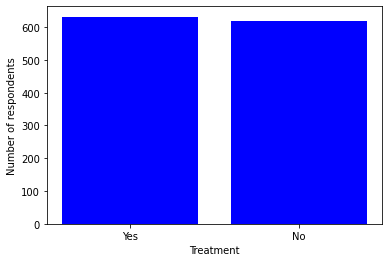

In [143]:
from matplotlib import pyplot as plt

treatment = mh_df["treatment"].value_counts()
plt.bar(treatment.index, treatment.values, color="blue")
plt.xlabel("Treatment")
plt.ylabel("Number of respondents")
plt.show()

- This dataset does not give any information about whether each respondent currently has a mental health issue or not. 
- "treatment" indicates whether workers have sought treatment for a mental health condition or not. However, it does not tell about the current health condition.
- Depite the limitation above, this variable can be used as a lable representing each respondent's mental health condition.

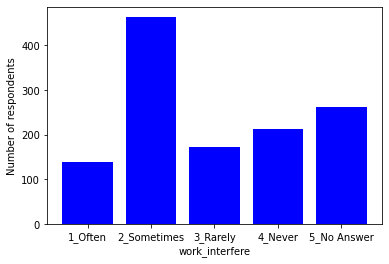

In [14]:
from matplotlib import pyplot as plt

work_interfere = mh_df["work_interfere"].value_counts().sort_index()
plt.bar(work_interfere.index, work_interfere.values, color="blue")
plt.xlabel("work_interfere")
plt.ylabel("Number of respondents")
plt.show()

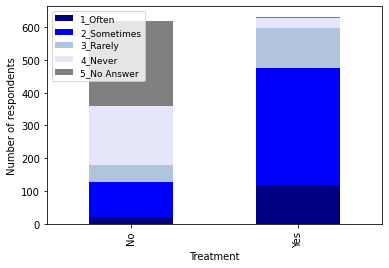

In [16]:
# TODO: Correlation(relationship) between the target variable and the other features
# Relationship between "treatment" and "work_interfere"
cross = pd.crosstab(mh_df["treatment"],mh_df["work_interfere"])
cross.plot.bar(stacked=True, color={"1_Often": "navy", "2_Sometimes": "blue", 
                                    "3_Rarely": "lightsteelblue", "4_Never": "lavender",
                                   "5_No Answer":"Gray"})
plt.xlabel("Treatment")
plt.ylabel("Number of respondents")
plt.legend(loc="upper left", fontsize=9)

In [21]:
# Relationship between "treatment" and "age"


Research question1:  
- Employees who are willing to share mental health problems with others are less likely to have productivity issues in their workplace. 
    Willingness to share the issues: "coworkers", "supervisor"
    Workplace issue: "work_interfere"

In [140]:
# Define a function creating a stacked bar chart
def create_bar_chart(feature, label):
    # Create a 2x2 table with a feature and a label
    cross = pd.crosstab(feature,label,normalize="index")
     
    # Designate colors
    cmap = plt.get_cmap("Blues")
    colors = []
    for i in range(len(label.unique())):
        colors += [cmap(i/(len(label.unique())))]
        i += 1
    
    # Plot a stacked bar chart
    cross.plot.bar(stacked=True, color=colors, edgecolor="gray",linewidth=0.5)    
    plt.ylabel("% of respondents")
    plt.legend(loc="upper left", fontsize=9)

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64


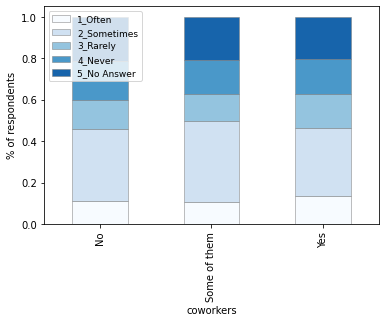

In [136]:
# Relationship between "coworkers" and "work_interfere"
print(mh_df["coworkers"].value_counts())
create_bar_chart(mh_df["coworkers"],mh_df["work_interfere"])

- There seems no relationship between "work_interfere" and employees' willingness to discuss a mental health issue

Some of them    389
Yes             126
No              117
Name: coworkers, dtype: int64


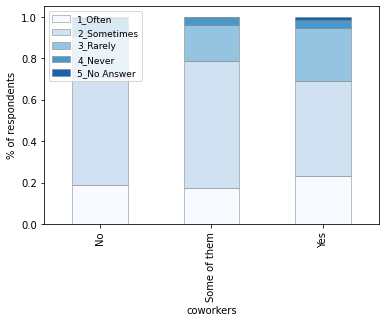

In [137]:
# Relationship between "coworkers" and "work_interfere" - only employees with treatment experience
# Create a subset
sub_mh_df = mh_df[mh_df["treatment"]=="Yes"]

print(sub_mh_df["coworkers"].value_counts())
create_bar_chart(sub_mh_df["coworkers"],sub_mh_df["work_interfere"])

- Employees who have treatment experience and willingness to discuss with their coworkers are less likely to feel work interference.

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64


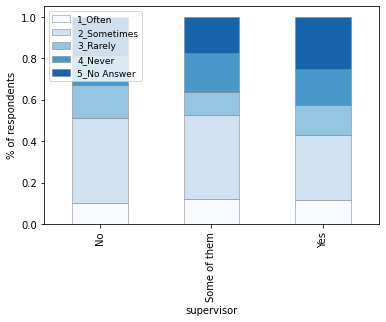

In [138]:
# Relationship between "supervisor" and "work_interfere" 
print(mh_df["supervisor"].value_counts())

create_bar_chart(mh_df["supervisor"],mh_df["work_interfere"])

- Employees who are willing to discuss with their supervisor are less likely to feel work interference.

Yes             248
No              204
Some of them    180
Name: supervisor, dtype: int64


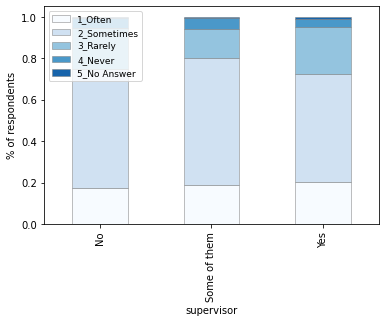

In [139]:
# Relationship between "supervisor" and "work_interfere" - only employees with treatment experience
print(sub_mh_df["supervisor"].value_counts())

create_bar_chart(sub_mh_df["supervisor"],sub_mh_df["work_interfere"])

- Employees who have treatment experience and willingness to discuss with their supervisor are less likely to feel work interference.

Research question 1 - Results: 

Employees who are more willing to discuss their mental health issues with others are less likely to feel work interference. Promoting social interactions in workplaces may prevent employees with mental health issues from losing their productivity.

Research question 2:
- Does supports from employers create a good working environment where employees with a mental health issue can work comfortably? 
    Employer's support: "benefits", "care_options", "wellness_program", "seek_help", "mentalvsphysical", ("mentalhealthconsequence")
    Working condition: "obs_consequence"

No            641
Don't know    363
Yes           247
Name: seek_help, dtype: int64


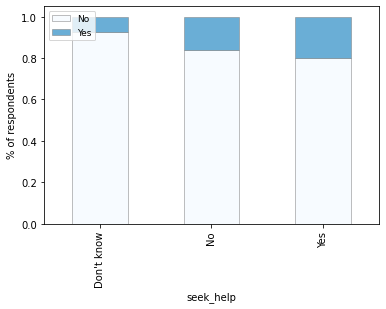

In [141]:
print(mh_df["seek_help"].value_counts())
create_bar_chart(mh_df["seek_help"],mh_df["obs_consequence"])